# Inscopix python API - post processing analysis
### This notebook contains the procedure for visulizing the processed Ca2+ traces from CNMFe

### Import packages 
the inscopix python API is located in the same folder of data processing software. The isx.cnmfe is used for ROI detection.

In [1]:
import sys
sys.path.append("/Program Files/Inscopix/Data Processing/")
import os
import isx
import numpy as np
import pandas as pd
# In order to use matplotlib with anaconda and the isx module, we have to switch to # the TkAgg backend, there can be issues with Qt library conflicts otherwise. 
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' #'retina' 

### File path
Here, we first load the processed data from the -CNMFE.isxd file.

In [2]:
path_to_file = 'F:/inscopix_new/'
data_dir = os.path.join(path_to_file, 'DSC012019200821') # Only change here
processed_dir = os.path.join(data_dir, 'processed')

file_names_in_path = []
file_names_in_path = os.listdir(processed_dir)
#print(sorted(file_names_in_path))

CNMFE_cellset_file = []
CNMFE_events_file = []
metrics_file = []

for file in os.listdir(processed_dir):
    if file.endswith("CNMFE_17.isxd"):
        CNMFE_cellset_file = os.path.join(processed_dir, file)
        metrics_file = os.path.join(processed_dir, file+'-Metrics.csv')
        print('CellSet:',CNMFE_cellset_file)
        print('Metrics_Output:',metrics_file)
        
    elif file.endswith("CNMFE_17-ED.isxd"):
        CNMFE_events_file = os.path.join(processed_dir, file)
        print('Events:',CNMFE_events_file)

Events: F:/inscopix_new/DSC012019200821\processed\recording_20200821_162215-PP-BP-MC-CNMFE_17-ED.isxd
CellSet: F:/inscopix_new/DSC012019200821\processed\recording_20200821_162215-PP-BP-MC-CNMFE_17.isxd
Metrics_Output: F:/inscopix_new/DSC012019200821\processed\recording_20200821_162215-PP-BP-MC-CNMFE_17.isxd-Metrics.csv


In [3]:
# Generate output file
if not os.path.exists(metrics_file):
    isx.cell_metrics(CNMFE_cellset_file, CNMFE_events_file, metrics_file)

In [4]:
# Read generated csv file
metrics_df = pd.read_csv(metrics_file)

In [5]:
# Open the cell set and get the names of accepted cells.
cellset = isx.CellSet.read(CNMFE_cellset_file)
accepted_cells = [cellset.get_cell_name(k)
                  for k in range(cellset.num_cells)
                  if cellset.get_cell_status(k) == 'accepted']
del cellset

# Create a logical index that only references accepted cells with reasonable SNRs.
accept_i = metrics_df.cellName.isin(accepted_cells) & (metrics_df.snr > 1)

In [6]:
metrics_df[accept_i]

,cellName,snr,mad,eventRate,eventAmpMedian,eventAmpSD,riseMedian,riseSD,decayMedian,decaySD,numContourComponents,overallCenterInPixelsX,overallCenterInPixelsY,overallAreaInPixels,overallMaxContourWidthInPixels,largestComponentCenterInPixelsX,largestComponentCenterInPixelsY,largestComponentAreaInPixels,largestComponentMaxContourWidthInPixels
0,C0,1.182940e+01,1.740430,0.081413,20.58820,9.72254,0.200,0.523246,0.975,1.582550,1,240,22,54.5,10.00000,240,22,54.5,10.00000
1,C1,5.453790e+01,0.102613,0.067255,5.59627,3.94518,0.200,1.101730,0.975,1.367930,2,-9223372036854775808,-9223372036854775808,54.5,21.84030,255,69,54.5,15.23150
2,C2,2.635110e+01,2.760210,0.165187,72.73470,31.43570,1.650,3.812880,3.600,5.817750,1,169,112,54.5,9.43398,169,112,54.5,9.43398
3,C3,6.405480e+00,4.236320,0.100292,27.13570,14.22640,0.325,2.237190,1.325,1.936870,1,167,115,50.5,11.18030,167,115,50.5,11.18030
4,C4,1.000620e+01,11.547100,0.145718,115.54300,42.31570,2.450,5.054080,4.550,10.725400,1,206,91,54.0,10.44030,206,91,54.0,10.44030
5,C5,4.748580e+01,0.430901,0.382290,20.46170,7.72500,2.975,6.926660,4.900,9.349870,1,210,82,54.5,10.44030,210,82,54.5,10.44030
6,C6,4.122700e+00,9.435890,0.213563,38.90140,15.79940,0.350,2.024680,1.500,6.534470,1,202,92,52.5,10.44030,202,92,52.5,10.44030
7,C7,2.500970e+01,1.315760,0.057225,32.90680,14.38160,0.100,0.405185,0.600,0.924425,1,205,95,57.5,10.81670,205,95,57.5,10.81670
8,C8,2.464270e+01,4.261920,0.175806,105.02500,91.44240,1.200,4.273140,3.000,6.520940,1,147,170,47.5,8.94427,147,170,47.5,8.94427
9,C9,2.231380e+01,1.474230,0.173446,32.89560,12.30970,0.100,0.602898,0.675,0.785257,2,149,146,57.0,15.23150,145,147,55.0,12.04160


<Figure size 720x720 with 0 Axes>

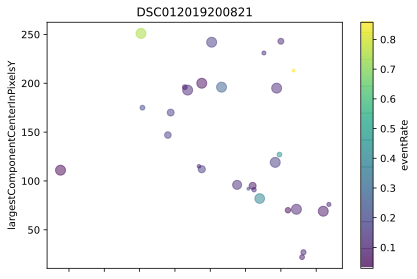

In [7]:
# Make a scatter plot of cells at the centroids where the color indicates 
# event rate and size indicates signal-to-noise ratio.
plt.figure(figsize=(10,10))
circle_size = metrics_df[accept_i]['snr'] * 2
circle_size[circle_size>100]=100

metrics_df[accept_i].plot.scatter(x='largestComponentCenterInPixelsX',
                                  y='largestComponentCenterInPixelsY', 
                                  c='eventRate', s=circle_size, 
                                  colormap=plt.cm.viridis,
                                  alpha=0.5)

#plt.ylabel('Y position')
plt.title(data_dir.split('/')[-1])
plt.tight_layout()
plt.show()

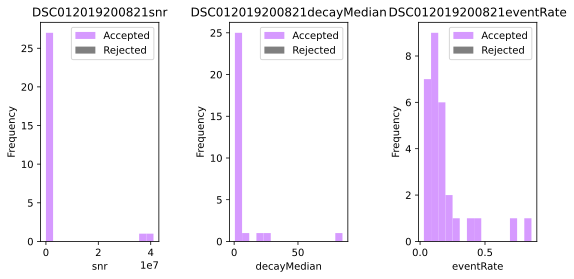

In [8]:
# Create histograms of SNR, decay time, and event rate that show accepted # vs rejected cells.
plt.figure(figsize=(8,4))
# Enumerate over the three columns of interest and make histograms that
# show the accepted cells in one color, and rejected cells in another color. 
for k,col in enumerate(['snr', 'decayMedian', 'eventRate']):
    ax = plt.subplot(1, 3, k+1)
    n, bins, patches = plt.hist(metrics_df[col][accept_i], bins=15, facecolor='#d69aff')
    plt.hist(metrics_df[col][~accept_i], bins=bins, facecolor='k', alpha=0.5) 
    plt.legend(['Accepted', 'Rejected'])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(data_dir.split('/')[-1]+col)
plt.tight_layout()
plt.show()

In [8]:
file_names_in_path = []
file_names_in_path = os.listdir(data_dir)
rec_name = file_names_in_path[6][:-8] # This should be the first/sec raw file in the list with the time stamp
